In [1]:
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
from sklearn.model_selection import train_test_split

Choose models from bellow link :
- https://tfhub.dev/google/collections/bert/1


Model splited into 2 parts : 
- BERT Encoder Model
- BERT Pre-processing Model

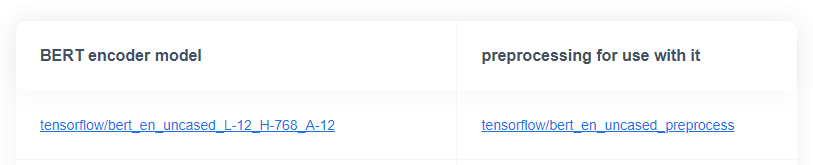

BERT processing flows is following :

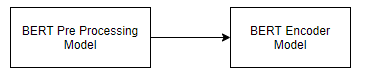

## 1. Bert Pre-processing model
*What pre-processing model do*

In [ ]:
# Download processing BERT Model from tensorhub
"""
Pre-processing model will be downloaded from tensorflow Hub.
"""
pre_processing_url = "https://tfhub.dev/tensorflow/bert_en_uncasepre_processing_urlrocess/3"
bert_pre_pros_model = hub.KerasLayer(pre_processing_url)

In [4]:
text_test = ["nice movie indeed", "I love python programing"]
text_processed = bert_pre_pros_model(text_test)

In [6]:
text_processed.keys()

dict_keys(['input_mask', 'input_word_ids', 'input_type_ids'])

**Output of BERT Preprocessing model**
- Input_mask
- Input_word_id
- Input_type_ids

### 1.1 Input Mask

Length of sentence is setted with 128 character. If the length is not enough, it will be padding with 0 values until the length became 128 character.

> "nice movie indeed" -> "[CLS] nice movie indeed [SEP]" -> [1,1,1,1,1] + [0,....0]

In [10]:
text_processed.get('input_mask')

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

### 1.2 Word ids

Words id from BERT vocablarry. 
- Start charactor's id is 101, finish charactor's id is 102

In [12]:
text_processed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

### 1.3 Input type Ids

Used in next sentence prediction. The input sentence must to be merge into same sentence, and determine by input type id.

> What's wether today! It's sunny day -> Input type ids : [1,1,1,2,2,2,0,0,0....0]

In [14]:
text_processed['input_type_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

## 2. BERT Encoder model 

*Download Encoder model, see what Encoder Model do and how to use encoder model*

The architecture of model is describle as bellow.
It has 12 encoder layer, 768 hidden size (same with embedding size), 128 hidden unit (same with default length of sentence)

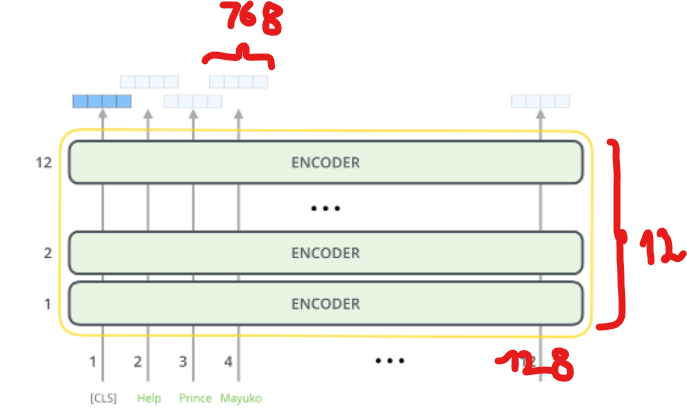

In [15]:
# Load bert encoder model
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
bert_model = hub.KerasLayer(encoder_url)

In [16]:
# Encoder pre-processed text with BERT encoder model
bert_result = bert_model(text_processed)

In [17]:
# Output of bert encoder model result 
bert_result.keys()

dict_keys(['sequence_output', 'default', 'pooled_output', 'encoder_outputs'])

### 2.1 Encoder Output

Relate doc : https://jalammar.github.io/illustrated-bert/

Model we're using is BERT Base, mean that the model has 12 Encoder Layer as bellow. Encoder outputs will return 12 arrays as 12 output layers

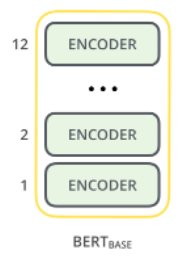

In [24]:
print(len(bert_result['encoder_outputs']))

12


In [31]:
bert_result['encoder_outputs'][0].shape

TensorShape([2, 128, 768])

### 2.2 Sequence Output

The value from last encoder layers. This values can get from last elements in encoder_outputs list.

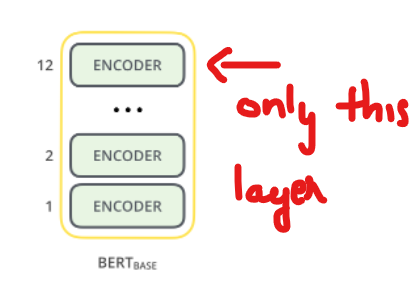

Return shape is x,y,z.
- x : Depend on the number of input sentences. We have 2 input senteces
- y : Length of cutoff sentece. 128 is default setting.
- z : Length of hiden size. 768 is default setting.

In [33]:
bert_result['sequence_output'].shape

TensorShape([2, 128, 768])

### 2.3 Pooled Output

TODO : Search how sequence output calculated.

> This is is not calculated by average, max or mean polling of last layer or all layer from bert_result.

This layer values canbe used to calculated similarity of 2 sentences, or input for classification models.

In [35]:
bert_result['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.79177386, -0.214119  ,  0.4976955 , ...,  0.2446523 ,
        -0.47334465,  0.8175868 ],
       [-0.8998871 , -0.5022245 , -0.8014916 , ..., -0.6026435 ,
        -0.6991161 ,  0.90730983]], dtype=float32)>

## 3. Tuning BERT Models

By using BERT pre-processing and Encoder Model, with each setence input, we got Encoder vector as result. 

To Tuning BERT model, we can add simple layer like Dense into the last Layer to predict the target we want. 

In this pratical, we will tuning BERT model to predict whether an email is spam or not.

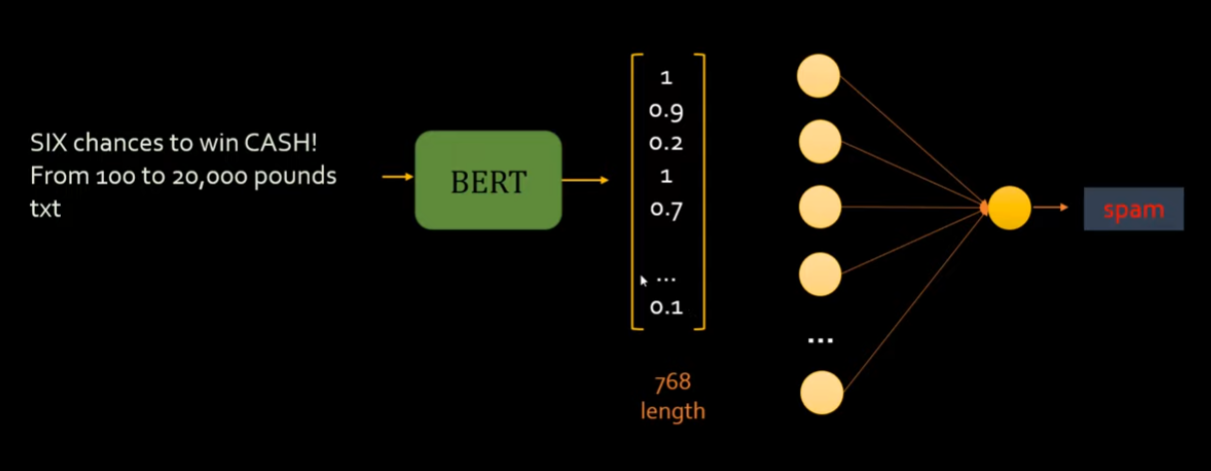

### 3.1 Prepare Data

In [127]:
# Load raw data
df_raw = pd.read_csv("data/spam.csv", encoding='mbcs')[["v1", "v2"]]
df_raw.rename(columns={"v1": "label", "v2": "sentences"}, inplace=True)

# Encode label
df_raw['label_encoded'] = df_raw.label.apply(lambda x: int(x=='spam'))

In [129]:
df_raw['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [130]:
# Unbalanced data -> Down Sampling

df_spam = df_raw.loc[df_raw.label != 'ham']
df_ham = df_raw.loc[df_raw.label == 'ham'].sample(len(df_spam))

df_balance = pd.concat([df_spam, df_ham]).reset_index(drop=True)

In [139]:
df_balance.head(3)

,label,sentences,label_encoded
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,spam,FreeMsg Hey there darling it's been 3 week's n...,1
2,spam,WINNER!! As a valued network customer you have...,1


In [132]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(df_balance["sentences"], df_balance["label_encoded"], test_size=0.3) 

### 3.2 Load BERT model

In [ ]:
# Load pre processing model
pre_processing_url = "https://tfhub.dev/tensorflow/bert_en_uncasepre_processing_urlrocess/3"
bert_pre_pros_model = hub.KerasLayer(pre_processing_url)

# Load bert encoder model
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
bert_model = hub.KerasLayer(encoder_url)

### 3.3 Design Models

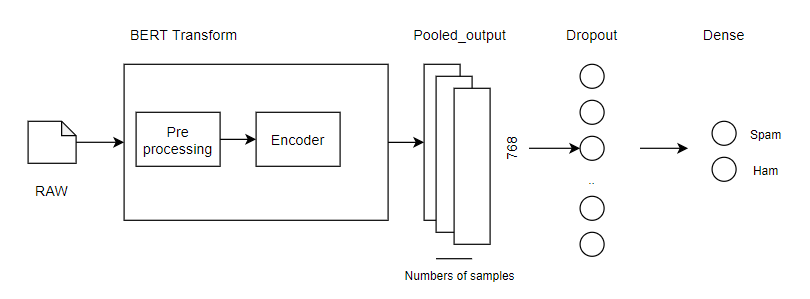

There are 2 type of training tensor models,
- Sequence models
- Functional models

Bellow article describle the diffirence between two types.
- https://becominghuman.ai/sequential-vs-functional-model-in-keras-20684f766057

To add the layer to models, in this article we will use functional model to add last layer

In [151]:
# Define BERT layer

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_pre_pros_model(text_input)
outputs = bert_model(preprocessed_text)

# Define Neural Network Layer
l = tf.keras.layers.Dropout(0.1, name="drop_out")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation="sigmoid", name='output')(l)

# Define model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [152]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [154]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name="Accuracy"),
    tf.keras.metrics.Precision(name="Precision"),
    tf.keras.metrics.Recall(name="Recall"),
]

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=METRICS)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
33/33 [==============================] - 111s 3s/step - loss: 0.6921 - Accuracy: 0.5589 - Precision: 0.5703 - Recall: 0.5478
Epoch 2/10
33/33 [==============================] - 108s 3s/step - loss: 0.5485 - Accuracy: 0.7799 - Precision: 0.7740 - Recall: 0.8030
Epoch 3/10
33/33 [==============================] - 106s 3s/step - loss: 0.4552 - Accuracy: 0.8574 - Precision: 0.8466 - Recall: 0.8799
Epoch 4/10
33/33 [==============================] - 106s 3s/step - loss: 0.4109 - Accuracy: 0.8469 - Precision: 0.8447 - Recall: 0.8574
Epoch 5/10
33/33 [==============================] - 107s 3s/step - loss: 0.3751 - Accuracy: 0.8737 - Precision: 0.8574 - Recall: 0.9024
Epoch 6/10
33/33 [==============================] - 108s 3s/step - loss: 0.3486 - Accuracy: 0.8861 - Precision: 0.8862 - Recall: 0.8912
Epoch 7/10
33/33 [==============================] - 108s 3s/step - loss: 0.3235 - Accuracy: 0.8900 - Precision: 0.8746 - Recall: 0.9156
Epoch 8/10
33/33 [==============================

### 3.4 Evaluation

In [157]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 48s 3s/step - loss: 0.2839 - Accuracy: 0.9109 - Precision: 0.9265 - Recall: 0.8832


[0.2839064300060272,
 0.9109131693840027,
 0.9264705777168274,
 0.8831775784492493]

### 3.5 Prediction

In [158]:
predict_result = model.predict(X_test).flatten()

15/15 [==============================] - 46s 3s/step


In [166]:
predict_values = np.where(predict_result > 0.5, 1, 0)

In [165]:
y_test

1413    0
748     0
105     1
349     1
1076    0
       ..
66      1
396     1
1445    0
1370    0
56      1
Name: label_encoded, Length: 449, dtype: int64